In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [22]:
# real estate data
data = {
    "train_data": "train.csv",
    "test_data": "test.csv"
}

url = "https://raw.githubusercontent.com/atn-iastate/STAT-502-Kaggle/master/data/"

train_data = pd.read_csv("{}{}".format(url, data['train_data']), delimiter=",")
test_data = pd.read_csv("{}{}".format(url, data['test_data']), delimiter=",")

In [3]:
# adding house_age and is_renovated
train_data['yr_sold'] = train_data['date'] // 10000
train_data['yr_sold'].head()
train_data['house_age'] = train_data['yr_sold'] - train_data['yr_built']
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

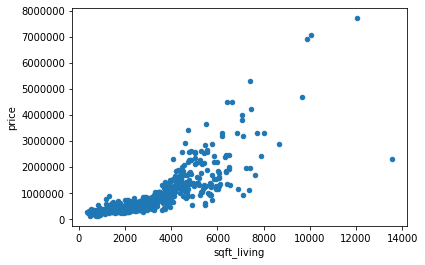

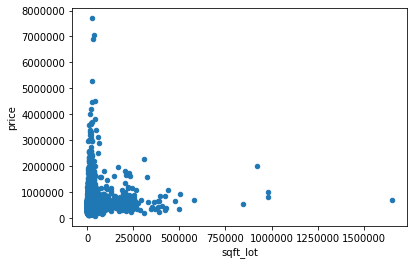

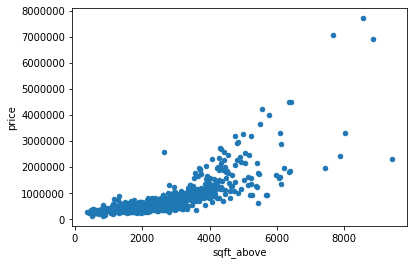

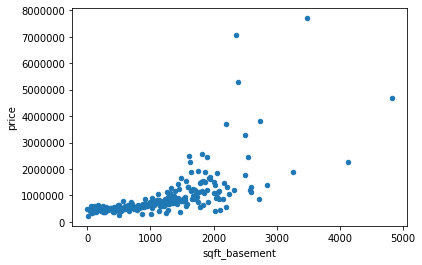

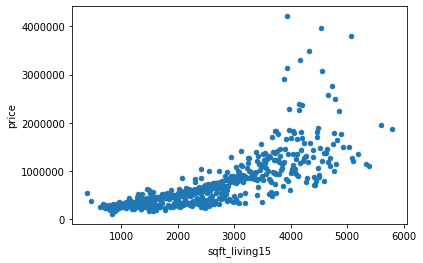

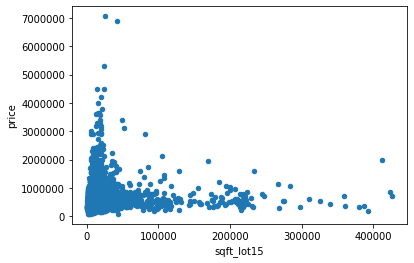

In [34]:
# areas
for col in train_data.columns:
    if 'sqft' in col:
        df = train_data[[col, 'price']].groupby([col]).mean().reset_index()
        df.plot(kind='scatter', x=col, y='price', use_index=False)

plt.show()

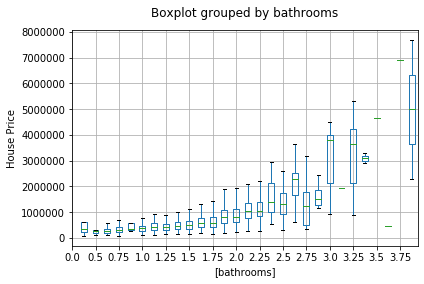

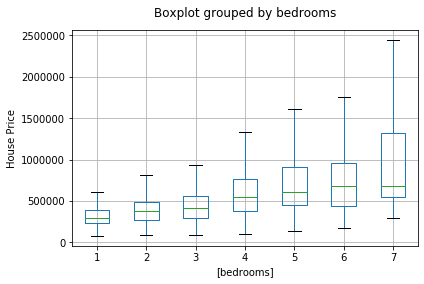

In [6]:
# bedrooms & bathrooms
df = train_data[['bathrooms', 'price']]
df.boxplot(by='bathrooms', showfliers=False)
plt.xticks(np.arange(0,30,2))
plt.title('')
plt.ylabel('House Price')
plt.show()

df = train_data[['bedrooms', 'price']]
df[(df['bedrooms'] <= 7) & (df['bedrooms'] > 0)].boxplot(by='bedrooms', showfliers=False)
plt.title('')
plt.ylabel('House Price')
plt.show()

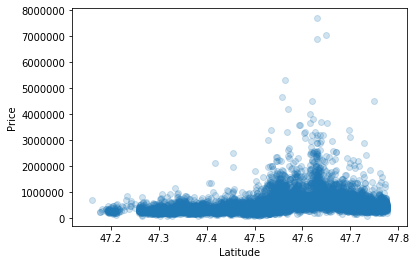

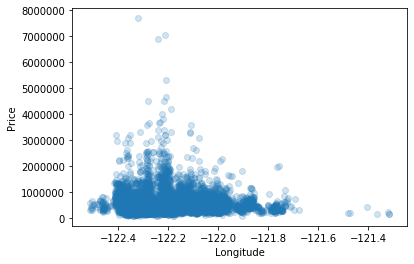

In [5]:
df = train_data[['lat', 'long', 'price']]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['lat'],df['long'],df['price'],c="darkgreen",alpha=.1)

plt.scatter(df['lat'], df['price'], alpha=.2)
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

plt.scatter(df['long'], df['price'], alpha=.2)
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()

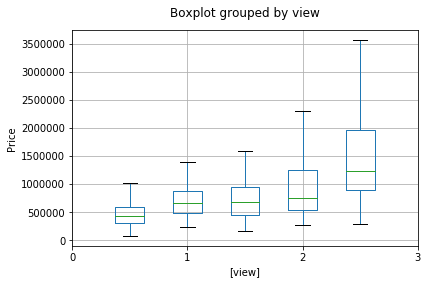

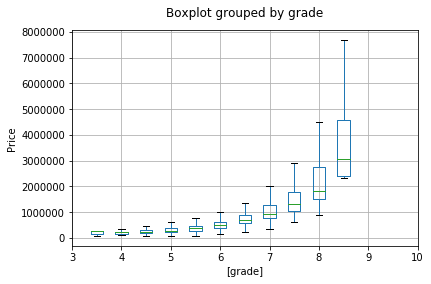

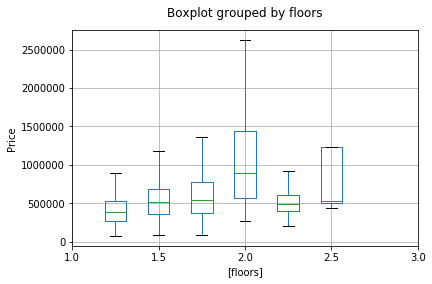

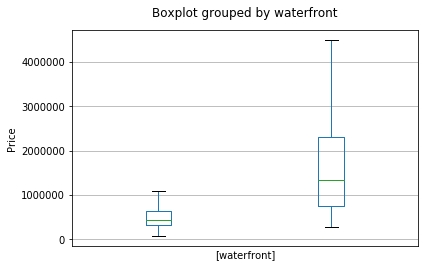

In [21]:
df = train_data[['view', 'price']]
df.boxplot(by='view', showfliers=False)
plt.xticks(np.arange(0,8,2))
plt.title('')
plt.ylabel('Price')
plt.show()

df = train_data[['grade', 'price']]
df.boxplot(by='grade', showfliers=False)
plt.xticks(np.arange(0,15,2))
plt.title('')
plt.ylabel('Price')
plt.show()

df = train_data[['floors', 'price']]
df.boxplot(by='floors', showfliers=False)
plt.xticks(np.arange(0,10,2))
plt.title('')
plt.ylabel('Price')
plt.show()

df = train_data[['waterfront', 'price']]
df.boxplot(by='waterfront', showfliers=False)
plt.xticks(np.arange(0,1,1))
plt.title('')
plt.ylabel('Price')
plt.show()

In [ ]:
df = train_data[['price', 'house_age']]
df['house_age'] = df['house_age'].apply(lambda x: 0 if x < 0 else x // 10)
df.boxplot(by='house_age', showfliers=False)
plt.title('')
plt.ylabel('Price')
plt.show()

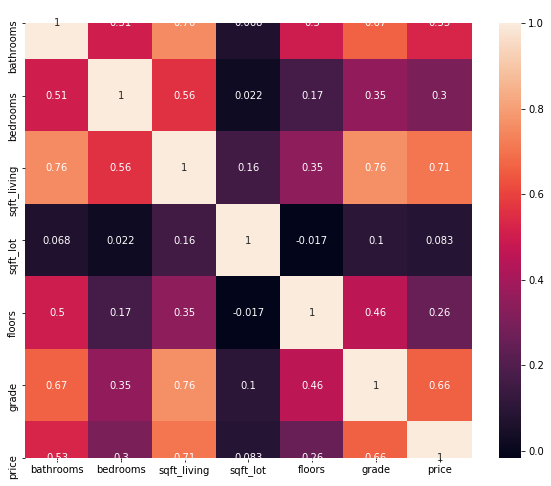

In [10]:
corr = train_data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.title('')
plt.show()

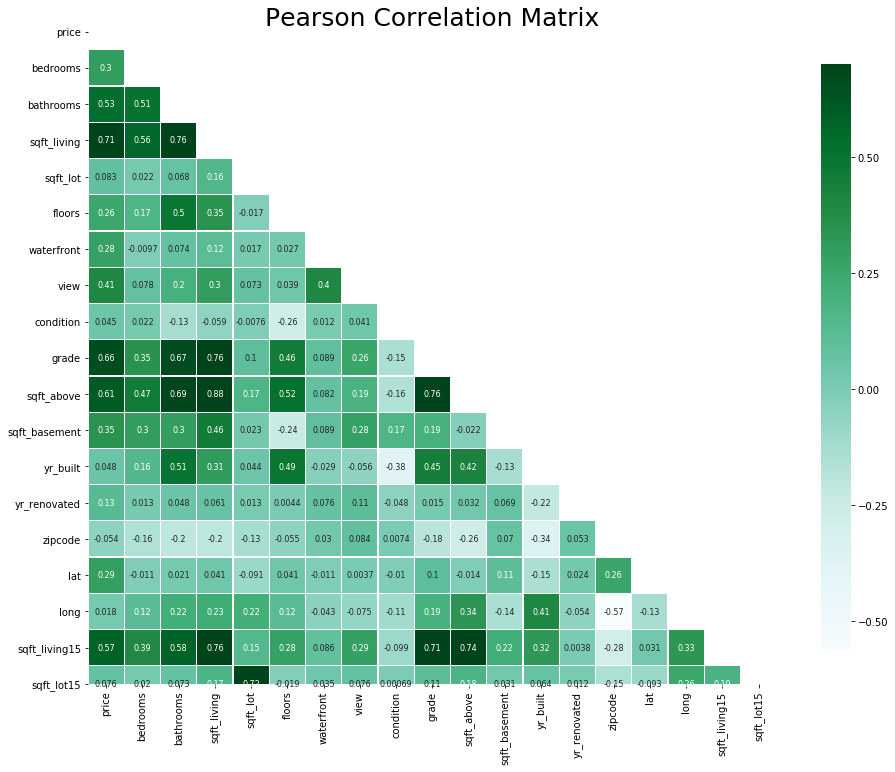

In [12]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(train_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});